<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/QuantumFourierTransform1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 K

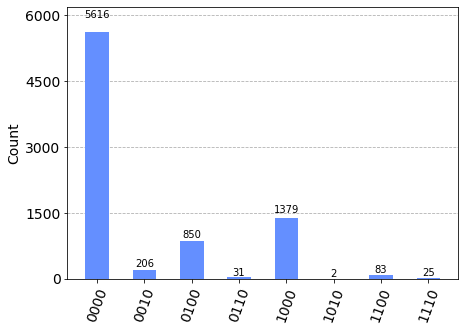

In [2]:
!pip install qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
import numpy as np
import math
from qiskit.visualization import plot_histogram

# Define the function f(x) = sin(ax)
a = 1

def f(x):
    return np.sin(a * x)

# Define the number of qubits to use
n = 4

# Define the range of values for x
x_vals = np.linspace(0, 2 * np.pi, 2**n, endpoint=False)

# Initialize the quantum circuit
qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qr, cr)

# Apply the Hadamard gate to all qubits
for i in range(n):
    qc.h(qr[i])

# Apply the function f(x) to the qubits
for i in range(n):
    qc.p(f(x_vals[i]), qr[i])

# Apply the inverse Fourier transform
for i in range(n):
    for j in range(i):
        qc.cp(-math.pi/float(2**(i-j)), qr[i], qr[j])
    qc.h(qr[i])

# Measure the qubits
qc.measure(qr, cr)

# Execute the circuit and get the results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=8192)
counts = job.result().get_counts()

# Plot the results
plot_histogram(counts)
